In [4]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import pickle

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
 

In [5]:
# Load the dataset
df = pd.read_csv('dataset/igbo_hate.csv')


In [6]:
df.head()

,Hate words,Why Hate?,Offensive words,Why offensive?
0,okpo ntu,Insulting,ile ngaji,Insulting
1,nwaanyi,Insulting,onye ori,Insulting
2,ewu,Insulting,onye mgbu,Insulting
3,ofe mmanụ,Discriminatory/neutral,ike,Insulting
4,ndi ugwu,Discriminatory/neutral,ụtụrụ gbagbuo gi,Insulting


In [7]:
df.columns

Index(['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?'], dtype='object')

In [8]:
def fill_na_with_mode(df, columns):
   
    for column in columns:
        if column in df.columns:
            mode_value = df[column].mode()[0]  # Get the mode of the column
            df[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode
    return df

In [9]:
# Apply the function to fill NaN values with the mode for specified columns
columns_to_fill = ['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?']
df = fill_na_with_mode(df, columns_to_fill)

print("\nDataFrame after filling NaN values with the mode:")
print(df)


DataFrame after filling NaN values with the mode:
       Hate words               Why Hate?   Offensive words  \
0        okpo ntu               Insulting         ile ngaji   
1         nwaanyi               Insulting          onye ori   
2             ewu               Insulting         onye mgbu   
3       ofe mmanụ  Discriminatory/neutral               ike   
4        ndi ugwu  Discriminatory/neutral  ụtụrụ gbagbuo gi   
..            ...                     ...               ...   
113  Dimkpa Benin  Discriminatory/neutral             agadi   
114  Dimkpa Benin  Discriminatory/neutral          onye nka   
115  Dimkpa Benin  Discriminatory/neutral    ozu nwụrụ anwụ   
116  Dimkpa Benin  Discriminatory/neutral         mmiri ozu   
117  Dimkpa Benin  Discriminatory/neutral       ụkwụ ọbọgwụ   

           Why offensive?  
0               Insulting  
1               Insulting  
2               Insulting  
3               Insulting  
4               Insulting  
..                    ..

In [10]:
# Combine 'Hate word' and 'Why Hate?' columns into one text column for hate speech
df['hate_text'] = df['Hate words']
df['offensive_text'] = df['Offensive words']

# Label the data: 1 for hate speech/offensive speech, 0 for non-hate/non-offensive speech
df['hate_label'] = 1
df['offensive_label'] = 1

In [11]:
df.columns

Index(['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?',
       'hate_text', 'offensive_text', 'hate_label', 'offensive_label'],
      dtype='object')

In [12]:
# Find the mode of the 'Hate words' column
hate_text_mode = df['hate_text'].mode()[0]
print("\nMost frequently occurring word (mode):", hate_text_mode)

# Fill NaN values with the mode
df['hate_text'].fillna(hate_text_mode, inplace=True)


Most frequently occurring word (mode): Dimkpa Benin


In [13]:
# Lower case all the words of the hate_text before any preprocessing
df['hate_text'] = df['hate_text'].str.lower()

# Removing punctuations present in the text
# punctuations_list = string.punctuation
# def remove_punctuations(text):
# 	temp = str.maketrans('', '', punctuations_list)
# 	return text.translate(temp)

# df['hate_text']= df['hate_text'].apply(lambda x: remove_punctuations(x))
# df.head()

In [14]:
# Lower case all the words of the offensive_text before any preprocessing
df['offensive_text'] = df['offensive_text'].str.lower()

# Removing punctuations present in the text
punctuations_list = string.punctuation
# def remove_punctuations(text):
# 	temp = str.maketrans('', '', punctuations_list)
# 	return text.translate(temp)

# df['offensive_text']= df['offensive_text'].apply(lambda x: remove_punctuations(x))
# df.head()


In [15]:
# def remove_stopwords(text):
# 	stop_words = stopwords.words('english')

# 	imp_words = []

# 	# Storing the important words
# 	for word in str(text).split():

# 		if word not in stop_words:

# 			# Let's Lemmatize the word as well
# 			# before appending to the imp_words list.

# 			lemmatizer = WordNetLemmatizer()
# 			lemmatizer.lemmatize(word)

# 			imp_words.append(word)

# 	output = " ".join(imp_words)

# 	return output


# df['Hate words'] = df['Hate words'].apply(lambda text: remove_stopwords(text))
# df.head()

In [16]:
# def remove_stopwords(text):
# 	stop_words = stopwords.words('english')

# 	imp_words = []

# 	# Storing the important words
# 	for word in str(text).split():

# 		if word not in stop_words:

# 			# Let's Lemmatize the word as well
# 			# before appending to the imp_words list.

# 			lemmatizer = WordNetLemmatizer()
# 			lemmatizer.lemmatize(word)

# 			imp_words.append(word)

# 	output = " ".join(imp_words)

# 	return output


# df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
# df.head()


In [17]:
df.columns

Index(['Hate words', 'Why Hate?', 'Offensive words', 'Why offensive?',
       'hate_text', 'offensive_text', 'hate_label', 'offensive_label'],
      dtype='object')

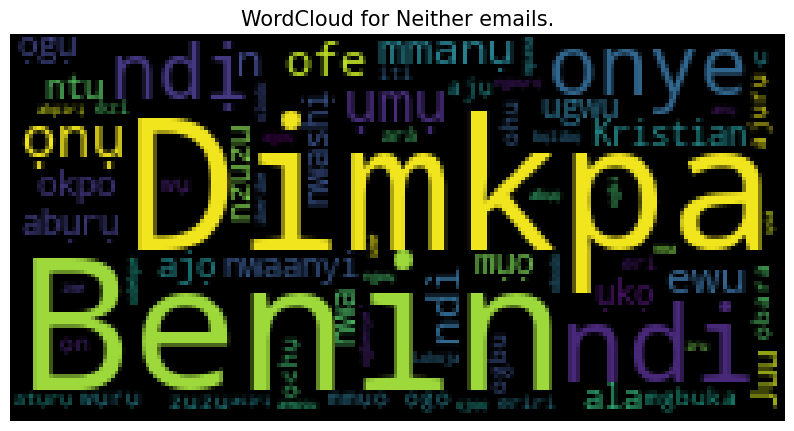

In [18]:
def plot_word_cloud(data, typ):
    # Joining all the tweets to get the corpus
    email_corpus = " ".join(data['Hate words'])
    
    plt.figure(figsize = (10,10))
    
    # Forming the word cloud
    wc = WordCloud(max_words = 100,
    				width = 200,
    				height = 100,
    				collocations = False).generate(email_corpus)
    
    # Plotting the wordcloud obtained above
    plt.title(f'WordCloud for {typ} emails.', fontsize = 15)
    plt.axis('off')
    plt.imshow(wc)
    plt.show()
    print()

plot_word_cloud(df[df['hate_label']==1], typ='Neither')


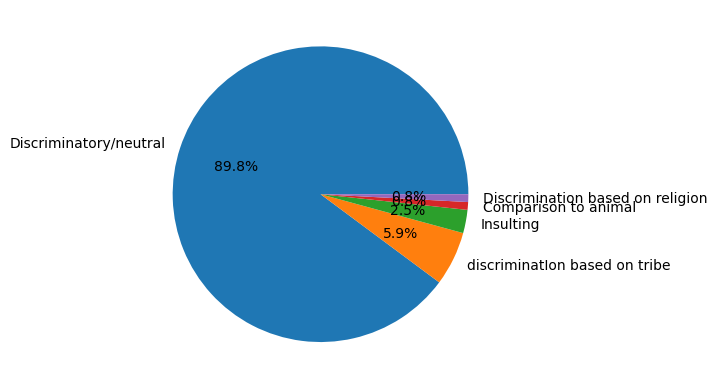

In [19]:
plt.pie(df['Why Hate?'].value_counts().values,
		labels = df['Why Hate?'].value_counts().index,
		autopct='%1.1f%%')
plt.show()


In [20]:
# Create a list of non-hate speech examples in Igbo
non_hate_speech = [
    "Nke a bụ okwu nkịtị.",
    "Enweghi okwu mwute ebe a.",
    "Ọ bụ mkparịta ụka nkịtị.",
    "Kedu ka ịmere?",
    "Adị m mma.",
    "Daalụ n'ala.",
    "Enwere m olileanya na ị dị mma.",
    "Chukwu gozie gị.",
    "Aga m abịa ụlọ gị echi.",
    "A na m akwado ịgụ akwụkwọ a.",
    "Anyị kwesịrị ịrụ ọrụ ọnụ.",
    "Abalị a dị ezigbo mma.",
    "A ga m arịrịọ maka gị.",
    "Anyị chọrọ udo.",
    "Kedu ka ezinụlọ gị dị?",
    "Ahụrụ m ihe a dị mma.",
    "Bịa ka anyị nwee ọṅụ.",
    "Achọrọ m ịnụ echiche gị.",
    "Anyị na-eche echiche ọma.",
    "Chineke nyeere anyị aka."
]

# Create a DataFrame for non-hate and non-offensive speech examples in Igbo
non_hate_df = pd.DataFrame({'hate_text': non_hate_speech, 'hate_label': 0, 'offensive_text': non_hate_speech, 'offensive_label': 0})

# Combine the datasets
combined_df = pd.concat([df[['hate_text', 'hate_label', 'offensive_text', 'offensive_label']], non_hate_df])

# Proceed with the rest of your machine learning pipeline


In [21]:
# Create a DataFrame for non-hate and non-offensive speech examples
non_hate_df = pd.DataFrame({'hate_text': non_hate_speech, 'hate_label': 0, 'offensive_text': non_hate_speech, 'offensive_label': 0})

# Combine the datasets
combined_df = pd.concat([df[['hate_text', 'hate_label', 'offensive_text', 'offensive_label']], non_hate_df])


In [22]:
import os

In [23]:
# Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

# Split into features and labels for hate speech
X_hate = combined_df['hate_text']
y_hate = combined_df['hate_label']

# Split into features and labels for offensive speech
X_offensive = combined_df['offensive_text']
y_offensive = combined_df['offensive_label']

# Split the data into training and testing sets
X_hate_train, X_hate_test, y_hate_train, y_hate_test = train_test_split(X_hate, y_hate, test_size=0.3, random_state=42)
X_offensive_train, X_offensive_test, y_offensive_train, y_offensive_test = train_test_split(X_offensive, y_offensive, test_size=0.3, random_state=42)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data
X_hate_train_tfidf = tfidf_vectorizer.fit_transform(X_hate_train)
X_hate_test_tfidf = tfidf_vectorizer.transform(X_hate_test)
X_offensive_train_tfidf = tfidf_vectorizer.fit_transform(X_offensive_train)
X_offensive_test_tfidf = tfidf_vectorizer.transform(X_offensive_test)

# Define the models to be tested
models = {
    'igbo_LogisticRegression': LogisticRegression(),
    'igbo_DecisionTree': DecisionTreeClassifier(),
    'igbo_RandomForest': RandomForestClassifier(),
    'igbo_SVM': SVC(),
    'igbo_KNN': KNeighborsClassifier(),
    'igbo_NaiveBayes': MultinomialNB()
}



In [24]:
# Dictionary to store the accuracy of each model
model_accuracy = {}

# Function to train and evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test, task_name):
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        predictions = model.predict(X_test)
        # Calculate accuracy
        accuracy = accuracy_score(y_test, predictions)
        # Store the accuracy
        model_accuracy[f"{task_name} - {model_name}"] = accuracy
        # Save the model
        with open(f'models/{task_name}_{model_name}.pkl', 'wb') as f:
            pickle.dump(model, f)


In [25]:

# Train and evaluate models for hate speech detection
train_and_evaluate(models, X_hate_train_tfidf, y_hate_train, X_hate_test_tfidf, y_hate_test, 'igbo_hate_speech')

# Train and evaluate models for offensive speech detection
train_and_evaluate(models, X_offensive_train_tfidf, y_offensive_train, X_offensive_test_tfidf, y_offensive_test, 'igbo_offensive_speech')



In [26]:
# Save the models
def save_models(models, task_name):
    for model_name, model in models.items():
        model_file_path = f'models/{task_name}_{model_name}.pkl'
        with open(model_file_path, 'wb') as f:
            pickle.dump(model, f)
        print(f"Model saved: {model_file_path}")

# Save the hate speech detection models
save_models(models, 'igbo_hate_speech')

# Save the offensive speech detection models
save_models(models, 'igbo_offensive_speech')

Model saved: models/igbo_hate_speech_igbo_LogisticRegression.pkl
Model saved: models/igbo_hate_speech_igbo_DecisionTree.pkl
Model saved: models/igbo_hate_speech_igbo_RandomForest.pkl
Model saved: models/igbo_hate_speech_igbo_SVM.pkl
Model saved: models/igbo_hate_speech_igbo_KNN.pkl
Model saved: models/igbo_hate_speech_igbo_NaiveBayes.pkl
Model saved: models/igbo_offensive_speech_igbo_LogisticRegression.pkl
Model saved: models/igbo_offensive_speech_igbo_DecisionTree.pkl
Model saved: models/igbo_offensive_speech_igbo_RandomForest.pkl
Model saved: models/igbo_offensive_speech_igbo_SVM.pkl
Model saved: models/igbo_offensive_speech_igbo_KNN.pkl
Model saved: models/igbo_offensive_speech_igbo_NaiveBayes.pkl


In [27]:
# Print the accuracy of each model
for model_name, accuracy in model_accuracy.items():
    print(f"{model_name}: {accuracy:.4f}")

# Save the TfidfVectorizer
with open('models/igbo_tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

igbo_hate_speech - igbo_LogisticRegression: 0.8571
igbo_hate_speech - igbo_DecisionTree: 0.9762
igbo_hate_speech - igbo_RandomForest: 0.8571
igbo_hate_speech - igbo_SVM: 0.9286
igbo_hate_speech - igbo_KNN: 0.9524
igbo_hate_speech - igbo_NaiveBayes: 0.9048
igbo_offensive_speech - igbo_LogisticRegression: 0.8571
igbo_offensive_speech - igbo_DecisionTree: 0.9524
igbo_offensive_speech - igbo_RandomForest: 0.8810
igbo_offensive_speech - igbo_SVM: 0.8571
igbo_offensive_speech - igbo_KNN: 0.9524
igbo_offensive_speech - igbo_NaiveBayes: 0.8571


In [28]:
df.head()

,Hate words,Why Hate?,Offensive words,Why offensive?,hate_text,offensive_text,hate_label,offensive_label
0,okpo ntu,Insulting,ile ngaji,Insulting,okpo ntu,ile ngaji,1,1
1,nwaanyi,Insulting,onye ori,Insulting,nwaanyi,onye ori,1,1
2,ewu,Insulting,onye mgbu,Insulting,ewu,onye mgbu,1,1
3,ofe mmanụ,Discriminatory/neutral,ike,Insulting,ofe mmanụ,ike,1,1
4,ndi ugwu,Discriminatory/neutral,ụtụrụ gbagbuo gi,Insulting,ndi ugwu,ụtụrụ gbagbuo gi,1,1
